In [1]:
import pandas as pd
import csv
import string
from string import digits
import numpy as np

In [2]:
import nltk

## Audi Topic Modeling

In [3]:
df=pd.read_csv(r"C:\Users\VoramatePasharawipas\Desktop\MSA-MRM GSU\Course\4-Fall 2019\Text Analytic\Finalproject\Final_Project_Data\Leaf.csv",sep=",")
df.head()

,comment,comment_id,post_id,post_time,post_title,time
0,Is there a huge difference in price? Of course...,epkkg78,bv1ntf,1.559268e+09,2016 SL vs 2017 SV,1559275907.0
1,The price is almost same. 2016 is $100 cheaper...,epkl1yr,bv1ntf,1.559268e+09,2016 SL vs 2017 SV,1559276202.0
2,"No OP, but mind if I ask why you'd set that pr...",epnh25r,bv1ntf,1.559268e+09,2016 SL vs 2017 SV,1559327333.0
3,Does the 2017 have any of the upgraded package...,epkm7wi,bv1ntf,1.559268e+09,2016 SL vs 2017 SV,1559276779.0
4,"I was quoting private seller prices, with a ba...",epnhz33,bv1ntf,1.559268e+09,2016 SL vs 2017 SV,1559327748.0


In [4]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\VoramatePasharawipas\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
data = df.comment.values.tolist()

In [6]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['is', 'there', 'huge', 'difference', 'in', 'price', 'of', 'course', 'you', 'want', 'bar', 'wouldn', 'even', 'consider', 'the', 'unless', 'it', 'at', 'deep', 'discount']]


In [7]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [8]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['be there huge difference price course want bar wouldn even consider deep discount', 'price be almost same be cheap still have month original warranty leave which be']


In [9]:
data_lemmatized

['be there huge difference price course want bar wouldn even consider deep discount',
 'price be almost same be cheap still have month original warranty leave which be',
 'op mind ask why set price sl  neck wood mile radius cheap be use sl be nearly non existant ve see be around sl would be steal  area be not great price thank help still try evaluate new use',
 'do have upgrade package quick charge cam',
 'be quote private seller price bar lose most know kwh battery be know have issue be look dealer price sound right don care win haggle bar know issue just go kbb',
 'doesn have around cam have quick charge',
 'thank help could elaborate kwh battery issue be first hearing',
 'value extra bar around cam would heavily suggest get leafspy check be be would essentially be same battery health would show bar battery be equal would still likely take warranty around cam simply doesn give peace mind extra longevity warranty do',
 'here awesome article that explain https insideevs com news nissan

In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

C:\Users\VoramatePasharawipas\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['the', 'price', 'is', 'almost', 'same', 'is', 'cheaper', 'than', 'but', 'still', 'has', 'months', 'of', 'original', 'warranty', 'left', 'which', 'is', 'plus']


In [11]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [12]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VoramatePasharawipas\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['work',
                   'great',
                   'good',
                   'from', 
                   'subject',
                   're', 
                   'edu', 
                   'use','take','love','thing','wrong','never','car',
                   'think','go',
                   'well','also','really','nice','bad'])

In [14]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Remove Stop Words
data_lemmatized = remove_stopwords(data_lemmatized)


print(data_lemmatized[:1])

[['huge', 'difference', 'price', 'course', 'want', 'bar', 'even', 'consider', 'deep', 'discount']]


In [15]:
data_lemmatized

[['huge',
  'difference',
  'price',
  'course',
  'want',
  'bar',
  'even',
  'consider',
  'deep',
  'discount'],
 ['price',
  'almost',
  'cheap',
  'still',
  'month',
  'original',
  'warranty',
  'leave'],
 ['op',
  'mind',
  'ask',
  'set',
  'price',
  'sl',
  'pron',
  'neck',
  'wood',
  'mile',
  'radius',
  'cheap',
  'sl',
  'nearly',
  'non',
  'existant',
  'see',
  'around',
  'sl',
  'would',
  'steal',
  'pron',
  'area',
  'price',
  'thank',
  'help',
  'still',
  'try',
  'evaluate',
  'new'],
 ['upgrade', 'package', 'quick', 'charge', 'cam'],
 ['quote',
  'private',
  'seller',
  'price',
  'bar',
  'lose',
  'know',
  'kwh',
  'battery',
  'know',
  'issue',
  'look',
  'dealer',
  'price',
  'sound',
  'right',
  'care',
  'win',
  'haggle',
  'bar',
  'know',
  'issue',
  'kbb'],
 ['around', 'cam', 'quick', 'charge'],
 ['thank',
  'help',
  'could',
  'elaborate',
  'kwh',
  'battery',
  'issue',
  'first',
  'hearing'],
 ['value',
  'extra',
  'bar',
  'aroun

## Create the Dictionary and Corpus needed for Topic Modeling

In [28]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [29]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[('bar', 1),
  ('consider', 1),
  ('course', 1),
  ('deep', 1),
  ('difference', 1),
  ('discount', 1),
  ('even', 1),
  ('huge', 1),
  ('price', 1),
  ('want', 1)],
 [('price', 1),
  ('almost', 1),
  ('cheap', 1),
  ('leave', 1),
  ('month', 1),
  ('original', 1),
  ('still', 1),
  ('warranty', 1)]]

## Building the Topic Model

In [18]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [20]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.093*"look" + 0.070*"may" + 0.051*"people" + 0.046*"warranty" + '
  '0.045*"give" + 0.041*"low" + 0.040*"show" + 0.026*"check" + 0.025*"fine" + '
  '0.024*"cool"'),
 (1,
  '0.236*"pron" + 0.134*"leaf" + 0.104*"get" + 0.042*"price" + 0.041*"need" + '
  '0.037*"still" + 0.029*"even" + 0.026*"day" + 0.025*"way" + 0.022*"want"'),
 (2,
  '0.173*"mile" + 0.074*"bar" + 0.069*"see" + 0.046*"lot" + 0.041*"dealer" + '
  '0.033*"right" + 0.032*"soh" + 0.031*"one" + 0.026*"live" + 0.023*"lose"'),
 (3,
  '0.061*"range" + 0.039*"time" + 0.020*"power" + 0.018*"long" + '
  '0.017*"chademo" + 0.015*"commute" + 0.014*"seem" + 0.014*"mean" + '
  '0.013*"winter" + 0.013*"option"'),
 (4,
  '0.173*"new" + 0.151*"make" + 0.061*"service" + 0.038*"call" + 0.030*"wait" '
  '+ 0.022*"post" + 0.019*"plus" + 0.019*"currently" + 0.014*"main" + '
  '0.013*"hope"'),
 (5,
  '0.223*"charge" + 0.063*"charger" + 0.036*"trip" + 0.035*"charging" + '
  '0.033*"home" + 0.031*"quick" + 0.026*"add" + 0.023*"road" + 0.

## Compute Model Perplexity and Coherence Score

In [30]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.984482584553207

Coherence Score:  0.39376299118659713


## Visualize the topics-keywords

In [22]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds')
pyLDAvis.save_html(vis, 'lda_20.html')

C:\Users\VoramatePasharawipas\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


## Building LDA Mallet Model

In [25]:
import os
# Mallet env variable and path for Windows 10 in B:/ drive
os.environ.update({'MALLET_HOME': r'C:/Users/VoramatePasharawipas/Desktop/mallet-2.0.8'})
mallet_path = 'C:/Users/VoramatePasharawipas/Desktop/mallet-2.0.8/bin/mallet'

In [26]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [60]:
# Visualize the topics
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
pyLDAvis.save_html(vis, 'ldamallet_20.html')

In [27]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(14,
  [('pron', 0.09606986899563319),
   ('lot', 0.04536632702571567),
   ('find', 0.03323629306162057),
   ('move', 0.03129548762736536),
   ('area', 0.025958272683163513),
   ('free', 0.021348859776807377),
   ('place', 0.018922852983988356),
   ('company', 0.018680252304706452),
   ('put', 0.017952450266860747),
   ('plan', 0.01576904415332363)]),
 (6,
  [('charge', 0.29673041332510797),
   ('charger', 0.05202549866337652),
   ('home', 0.04914661731441497),
   ('hour', 0.04112687641373638),
   ('time', 0.040098704503392965),
   ('level', 0.037425457536500104),
   ('charging', 0.03269586674892042),
   ('quick', 0.031873329220645695),
   ('full', 0.024059222702035782),
   ('leave', 0.023236685173761054)]),
 (3,
  [('pron', 0.48217550274223037),
   ('change', 0.0370201096892139),
   ('give', 0.024680073126142597),
   ('experience', 0.01896709323583181),
   ('easy', 0.014853747714808043),
   ('question', 0.013939670932358319),
   ('wife', 0.013711151736745886),
   ('add', 0.0127970749

## the optimal number of topics for LDA

In [31]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [32]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

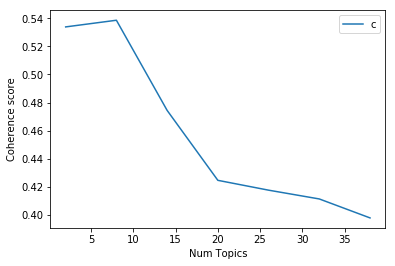

In [33]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [34]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5339
Num Topics = 8  has Coherence Value of 0.5386
Num Topics = 14  has Coherence Value of 0.4744
Num Topics = 20  has Coherence Value of 0.4246
Num Topics = 26  has Coherence Value of 0.4176
Num Topics = 32  has Coherence Value of 0.4113
Num Topics = 38  has Coherence Value of 0.3978


In [35]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=True)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.066*"pron" + 0.026*"lot" + 0.022*"electric" + 0.020*"vehicle" + '
  '0.018*"stop" + 0.017*"https_www" + 0.016*"brake" + 0.016*"gas" + '
  '0.013*"power" + 0.012*"feel"'),
 (1,
  '0.103*"pron" + 0.079*"charge" + 0.040*"charger" + 0.022*"run" + '
  '0.020*"home" + 0.019*"plug" + 0.016*"level" + 0.014*"charging" + '
  '0.013*"evse" + 0.011*"outlet"'),
 (2,
  '0.072*"pron" + 0.050*"bar" + 0.027*"km" + 0.022*"people" + 0.022*"low" + '
  '0.022*"time" + 0.020*"pretty" + 0.018*"winter" + 0.017*"fine" + '
  '0.016*"live"'),
 (3,
  '0.043*"nissan" + 0.021*"issue" + 0.020*"check" + 0.019*"service" + '
  '0.018*"problem" + 0.016*"show" + 0.016*"replace" + 0.014*"call" + '
  '0.014*"part" + 0.013*"dealership"'),
 (4,
  '0.042*"pron" + 0.035*"make" + 0.034*"leaf" + 0.030*"back" + 0.026*"find" + '
  '0.015*"option" + 0.012*"fix" + 0.011*"put" + 0.010*"big" + 0.009*"guess"'),
 (5,
  '0.076*"leaf" + 0.044*"buy" + 0.042*"model" + 0.034*"tesla" + 0.032*"price" '
  '+ 0.030*"cost" + 0.027*"pay"

## Finding the dominant topic in each sentence

In [36]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.1473,"leaf, buy, model, tesla, price, cost, pay, dea...",Is there a huge difference in price? Of course...
1,1,5.0,0.1533,"leaf, buy, model, tesla, price, cost, pay, dea...",The price is almost same. 2016 is $100 cheaper...
2,2,5.0,0.1888,"leaf, buy, model, tesla, price, cost, pay, dea...","No OP, but mind if I ask why you'd set that pr..."
3,3,2.0,0.1500,"pron, bar, km, people, low, time, pretty, wint...",Does the 2017 have any of the upgraded package...
4,4,5.0,0.1540,"leaf, buy, model, tesla, price, cost, pay, dea...","I was quoting private seller prices, with a ba..."
5,5,2.0,0.1557,"pron, bar, km, people, low, time, pretty, wint...",It doesn't have the around cam. Both have the ...
6,6,7.0,0.1500,"battery, kwh, year, leaf, warranty, soh, pack,...","Ah, thanks for the help. Could you elaborate o..."
7,7,7.0,0.1800,"battery, kwh, year, leaf, warranty, soh, pack,...",I value the extra bar over the around cam. I w...
8,8,7.0,0.2226,"battery, kwh, year, leaf, warranty, soh, pack,...",Here's an awesome article that explains it: ht...
9,9,5.0,0.1394,"leaf, buy, model, tesla, price, cost, pay, dea...",Great. Thanks. I just needed the extra assuran...


## Find the most representative document for each topic

In [37]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6088,"pron, lot, electric, vehicle, stop, https_www,...",\> if you believe that burning gas is bad for...
1,1.0,0.5297,"pron, charge, charger, run, home, plug, level,...",You're giving him unnecessarily confusing and ...
2,2.0,0.4991,"pron, bar, km, people, low, time, pretty, wint...",The capacity bars are more complicated than th...
3,3.0,0.6352,"nissan, issue, check, service, problem, show, ...","People have been saying the same FUD (fear, un..."
4,4.0,0.5963,"pron, make, leaf, back, find, option, fix, put...",I will be messaging you on [**2019-04-01 20:19...


## Topic distribution across documents

In [38]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics[:20]

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,5.0,"leaf, buy, model, tesla, price, cost, pay, dea...",901.0,0.1503
1,5.0,"leaf, buy, model, tesla, price, cost, pay, dea...",703.0,0.1173
2,5.0,"leaf, buy, model, tesla, price, cost, pay, dea...",710.0,0.1185
3,2.0,"pron, bar, km, people, low, time, pretty, wint...",754.0,0.1258
4,5.0,"leaf, buy, model, tesla, price, cost, pay, dea...",776.0,0.1295
5,2.0,"pron, bar, km, people, low, time, pretty, wint...",830.0,0.1385
6,7.0,"battery, kwh, year, leaf, warranty, soh, pack,...",650.0,0.1084
7,7.0,"battery, kwh, year, leaf, warranty, soh, pack,...",670.0,0.1118
8,7.0,"battery, kwh, year, leaf, warranty, soh, pack,...",NaN,NaN
9,5.0,"leaf, buy, model, tesla, price, cost, pay, dea...",NaN,NaN
